## EDA on NPTEL Dataset

### Import important library

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
# load datset usinf pandas
df=pd.read_excel('SWAYAM-NPTEL Local Chapter (6).xlsx')

In [101]:
df.head()

,S.no,Name,Emailid,Role,College Roll Number,Degree,Department,Study year,Exam Date,Course Name,Course id,State,City,PWD status,SC/ST status,FDP status,Amount,Status
0,1,vinay krishna,2000520400061@ietlucknow.ac.in,student,2.000520e+12,btech,mechanical_engineering,year_1,2021-04-24,Rocket Propulsion,ns_noc21_ae01,Uttar Pradesh,Lucknow,No,False,False,1000,payment_pending
1,2,APARNA SHARMA,1705231013@ietlucknow.ac.in,student,1.705231e+09,btech,electronics_and_communication_engineering,year_4,2021-03-21,Introduction to History of Architecture in India,ns_noc21_ar04,Uttar Pradesh,Lucknow,No,False,False,1000,payment_failed
2,3,AMAN YADAV,2000520519002@ietlucknow.ac.in,student,2.000521e+12,btech,chemical_engineering,year_2,2021-04-24,Material and Energy Balances,ns_noc21_bt04,Uttar Pradesh,Kanpur,No,False,False,1000,payment_failed
3,4,Israrul Hasan Hashmi,2000520519003@ietlucknow.ac.in,student,2.000521e+12,btech,chemical_engineering,year_2,2021-04-24,Material and Energy Balances,ns_noc21_bt04,Uttar Pradesh,Kanpur,No,False,False,1000,payment_failed
4,5,UPEKSHA,1805251060@ietlucknow.ac.in,student,1.805251e+09,btech,chemical_engineering,year_3,2021-04-24,Aspects Of Biochemical Engineering,ns_noc21_bt17,Uttar Pradesh,Lucknow,No,True,False,500,payment_draft


In [102]:
## Check Null VAlue
df.isnull().sum().sort_values(ascending=False)

College Roll Number    27
Degree                 23
Department             23
Study year             23
Status                  0
Amount                  0
Name                    0
Emailid                 0
Role                    0
Exam Date               0
Course Name             0
Course id               0
State                   0
City                    0
PWD status              0
SC/ST status            0
FDP status              0
S.no                    0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.no                 1263 non-null   int64  
 1   Name                 1263 non-null   object 
 2   Emailid              1263 non-null   object 
 3   Role                 1263 non-null   object 
 4   College Roll Number  1236 non-null   float64
 5   Degree               1240 non-null   object 
 6   Department           1240 non-null   object 
 7   Study year           1240 non-null   object 
 8   Exam Date            1263 non-null   object 
 9   Course Name          1263 non-null   object 
 10  Course id            1263 non-null   object 
 11  State                1263 non-null   object 
 12  City                 1263 non-null   object 
 13  PWD status           1263 non-null   object 
 14  SC/ST status         1263 non-null   bool   
 15  FDP status           1263 non-null   b

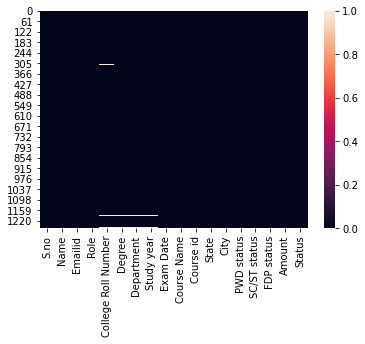

In [104]:
sns.heatmap(df.isnull())

In [105]:
# Fill NA Value
df['College Roll Number'].fillna(0,inplace=True)

In [106]:
df['Degree'].fillna('Teacher',inplace=True)

In [107]:
df['Study year'].fillna('Faculty',inplace=True)

In [108]:
df['Department'].fillna('',inplace=True)

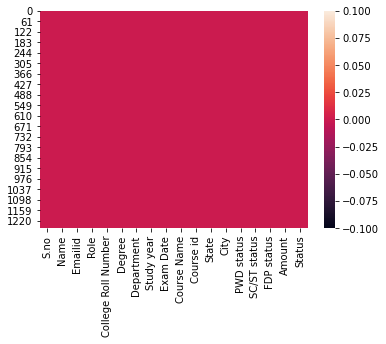

In [109]:
sns.heatmap(df.isnull())
# Now there is no null value

In [110]:
# Unwanted column drop
df.drop(columns=['Emailid','Role','College Roll Number','Course id','State','City','Amount'],axis=1,inplace=True)

In [111]:
df.head()

,S.no,Name,Degree,Department,Study year,Exam Date,Course Name,PWD status,SC/ST status,FDP status,Status
0,1,vinay krishna,btech,mechanical_engineering,year_1,2021-04-24,Rocket Propulsion,No,False,False,payment_pending
1,2,APARNA SHARMA,btech,electronics_and_communication_engineering,year_4,2021-03-21,Introduction to History of Architecture in India,No,False,False,payment_failed
2,3,AMAN YADAV,btech,chemical_engineering,year_2,2021-04-24,Material and Energy Balances,No,False,False,payment_failed
3,4,Israrul Hasan Hashmi,btech,chemical_engineering,year_2,2021-04-24,Material and Energy Balances,No,False,False,payment_failed
4,5,UPEKSHA,btech,chemical_engineering,year_3,2021-04-24,Aspects Of Biochemical Engineering,No,True,False,payment_draft


In [112]:
df.shape

(1263, 11)

## Change Branch Name To short name

In [113]:
df.replace({'Department': {'mechanical_engineering': 'ME', 'electrical_engineering': 'EE','computer_science_and_engineering':'CSE','electronics_and_communication_engineering':'ECE','chemical_engineering':'CHE','instrumentation_engineering':'EI','civil_engineering':'CE','information_technology':'IT'}},inplace=True)

In [114]:
# Year Change
df.replace({'Study year':{'year_1':'First','year_2':'Second','year_3':'Third','year_4':'Final'}},inplace=True)

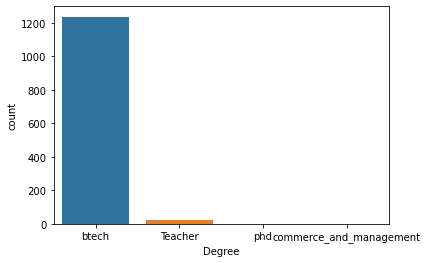

In [115]:
# Visyalize data by Degree
sns.countplot(df['Degree'])

In [116]:
df['Name'].value_counts()

Deep kumar         8
VIVEK KUMAR        7
Sandeep kumar      6
ADITYA KISHORE     5
ABHISHEK KUMAR     5
                  ..
Siddharth Singh    1
APOORVA GUPTA      1
shalini gupta      1
Vikram Singh       1
Priyanshi Singh    1
Name: Name, Length: 567, dtype: int64

### Visualize Data Department wise and groupby year

ME                          336
EE                          152
CSE                         149
ECE                         139
CHE                         138
EI                          120
CE                          113
IT                           70
                             23
electronics_engineering      20
business administration       2
mechatronics_engineering      1
Name: Department, dtype: int64

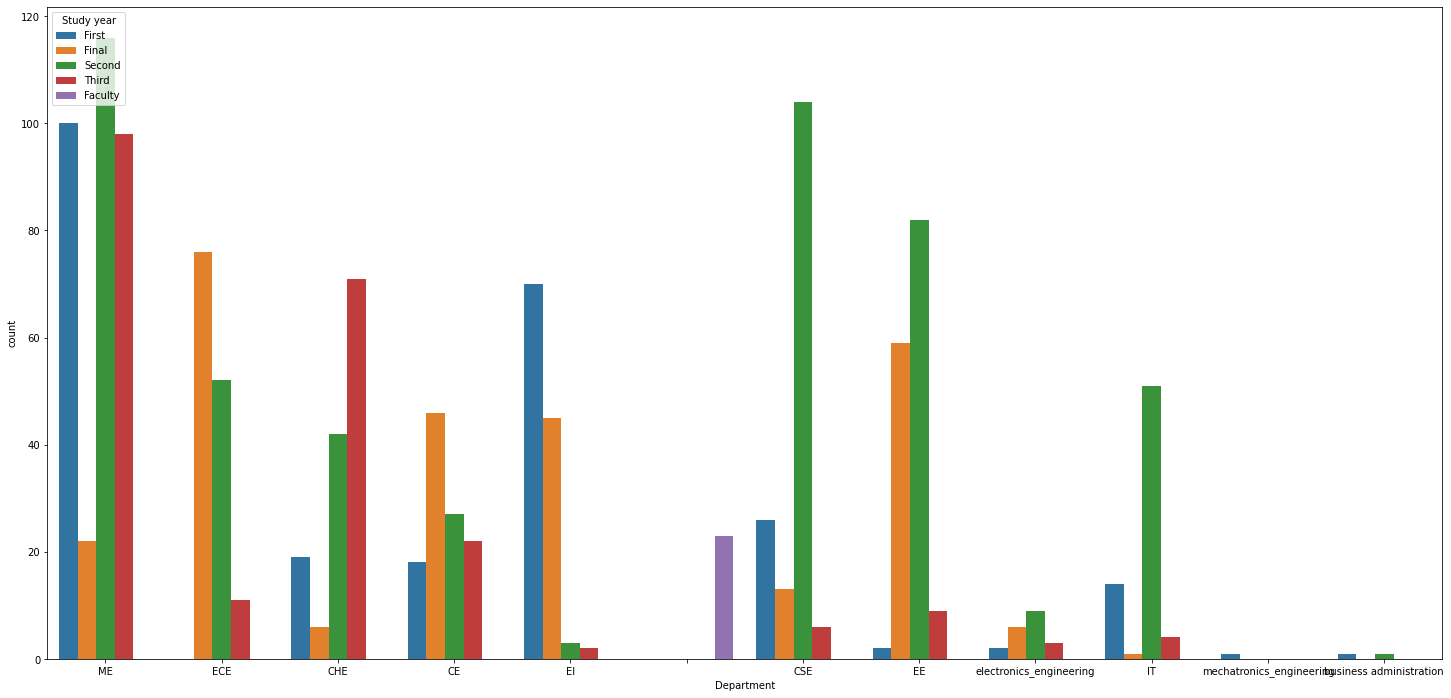

In [117]:
plt.figure(figsize=(25,12))
sns.countplot(df['Department'],hue=df['Study year'])
df['Department'].value_counts()

Emotional Intelligence                                            187
Enhancing Soft Skills and Personality                             185
Speaking Effectively                                              148
Introduction to Industry 4.0 and Industrial Internet of Things     83
Introduction to Robotics                                           41
                                                                 ... 
Fundamentals of Automotive Systems                                  1
Principles of Industrial Engineering                                1
Energy Resources, Economics and Environment                         1
Introduction to Research                                            1
Rocket Propulsion                                                   1
Name: Course Name, Length: 135, dtype: int64

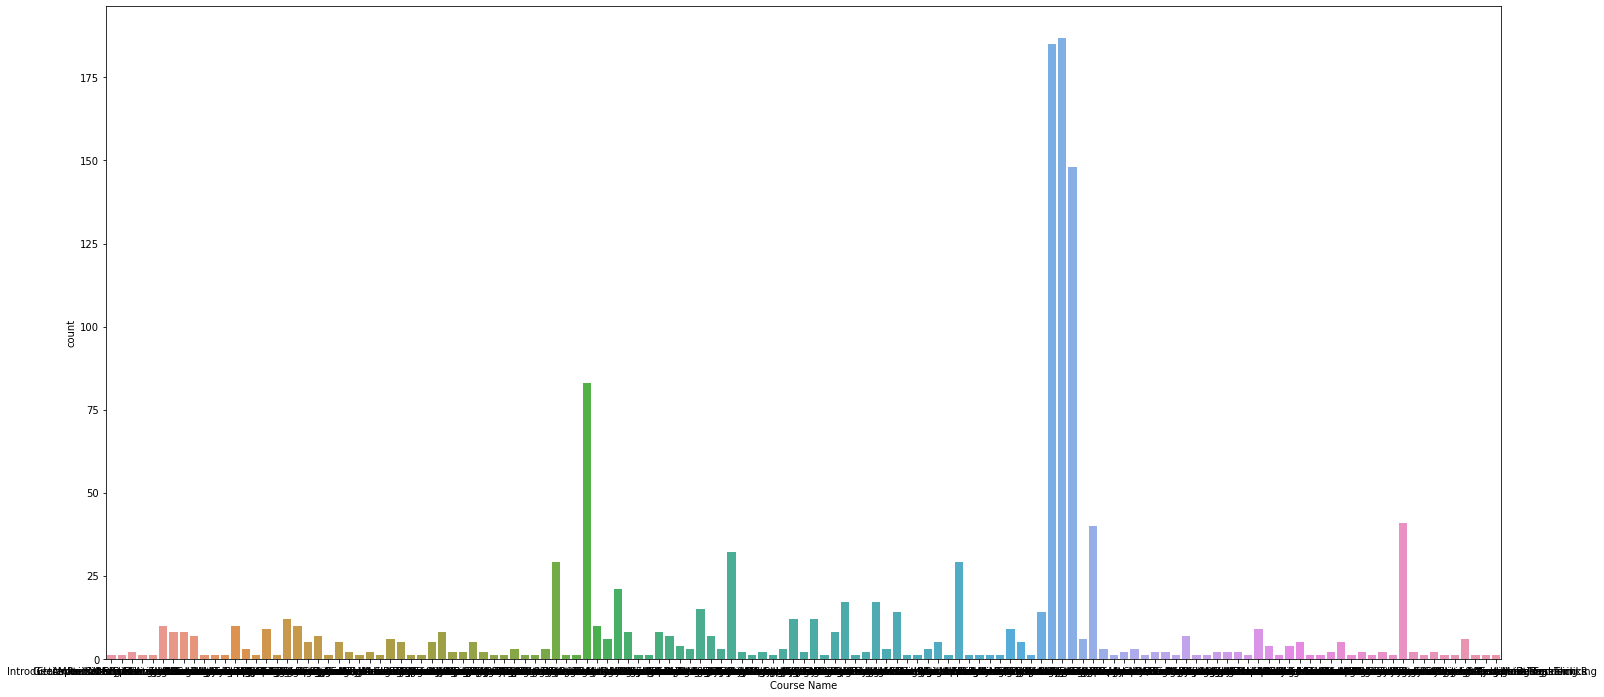

In [118]:
#check Data Course wise
plt.figure(figsize=(25,12))
sns.countplot(df['Course Name'])
df['Course Name'].value_counts()

Second     487
Final      274
First      253
Third      226
Faculty     23
Name: Study year, dtype: int64

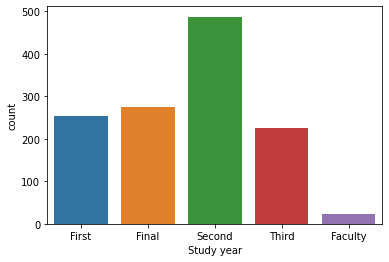

In [119]:
## Check year wise NPTel enrollment
sns.countplot(df['Study year'])
df['Study year'].value_counts()